In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1
from tqdm import tqdm

/Users/nirbhayareddy/Desktop/F1 project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
import pandas as pd

# 2023 dataset
df_2023 = pd.read_csv("/data/f1_ml_laps_dataset.csv")

# Adding season label if missing
if "season" not in df_2023.columns:
    df_2023["season"] = 2023
else:
    df_2023["season"] = df_2023["season"].fillna(2023).astype(int)

print(f"2023 rows: {len(df_2023):,}")

# 2022 dataset
df_2022 = pd.read_csv("/data/f1_2022_races.csv")

# Adding season label if missing
if "season" not in df_2022.columns:
    df_2022["season"] = 2022
else:
    df_2022["season"] = df_2022["season"].fillna(2022).astype(int)

print(f"2022 rows: {len(df_2022):,}")

df = pd.concat([df_2022, df_2023], ignore_index=True)

print(f"Total combined rows: {len(df):,}")
df.head()


2023 rows: 23,983
2022 rows: 23,050
Total combined rows: 47,033


,season,gp_name,session_name,session_type,driver,team,lap_number,lap_time,sector_1_time,sector_2_time,...,brake_mean,rpm_mean,rpm_max,drs_activations,air_temp,track_temp,humidity,wind_speed,wind_dir,pressure
0,2022,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,1,100.236,NaN,42.325,...,0.237197,10247.79784,12381,371,23.9,29.1,25,0.5,20,1010.2
1,2022,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,2,97.880,31.285,42.269,...,0.206612,10276.03030,11967,363,23.8,29.0,26,0.5,357,1010.4
2,2022,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,3,98.357,31.499,42.474,...,0.203655,10219.79112,12456,46,23.8,28.8,29,0.4,13,1010.2
3,2022,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,4,98.566,31.342,42.674,...,0.214286,10172.25824,12065,0,23.8,28.7,29,0.4,12,1010.4
4,2022,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,5,98.877,31.498,42.854,...,0.226415,10184.85984,12263,0,23.8,28.5,33,0.4,316,1010.4


In [4]:
# Summary statistics for numerical columns
df.describe()

,season,lap_number,lap_time,sector_1_time,sector_2_time,sector_3_time,position,track_status,stint,tyre_life,...,brake_mean,rpm_mean,rpm_max,drs_activations,air_temp,track_temp,humidity,wind_speed,wind_dir,pressure
count,47033.000000,47033.000000,47033.000000,46173.000000,47031.000000,47032.000000,47033.000000,47033.000000,47033.000000,46525.000000,...,47033.000000,47033.000000,47033.000000,47033.000000,47033.000000,47033.000000,47033.000000,47033.000000,47033.000000,47033.000000
mean,2022.509919,30.488062,92.361275,28.496311,35.616156,28.096266,9.745817,12.244424,2.162652,13.932058,...,0.207884,9935.610892,12124.715072,80.341250,24.317641,35.220609,52.606170,1.884254,179.973721,982.562820
std,0.499907,18.322539,14.660837,7.095991,7.895839,7.025179,5.387159,107.978773,1.004219,9.742599,...,0.051170,546.117884,382.957972,142.522362,4.820781,8.232937,18.495076,1.202906,97.821518,56.036957
min,2022.000000,1.000000,67.012000,16.835000,17.589000,16.913000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,12.800000,15.600000,5.000000,0.000000,0.000000,778.500000
25%,2022.000000,15.000000,81.792000,23.915000,30.273000,23.391000,5.000000,1.000000,1.000000,6.000000,...,0.174014,9736.870000,11946.000000,0.000000,21.000000,29.600000,39.000000,1.100000,109.000000,985.700000
50%,2023.000000,29.000000,90.350000,28.936000,34.024000,26.208000,10.000000,1.000000,2.000000,12.000000,...,0.204082,10027.263770,12092.000000,0.000000,24.700000,34.000000,55.000000,1.600000,168.000000,1003.200000
75%,2023.000000,45.000000,100.090000,31.709000,41.151500,31.399250,14.000000,1.000000,3.000000,19.000000,...,0.233333,10274.198350,12279.000000,88.000000,27.500000,41.600000,66.000000,2.400000,271.000000,1012.200000
max,2023.000000,78.000000,282.084000,92.283000,81.925000,87.594000,20.000000,2671.000000,8.000000,68.000000,...,1.000000,11009.587430,13701.000000,1048.000000,37.200000,57.500000,91.000000,8.600000,359.000000,1018.500000


In [ ]:
# Checking unique drivers, teams, compounds
print("Drivers:", df["driver"].unique())
print("Teams:", df["team"].unique())
print("Compounds:", df["compound"].unique())

Drivers: ['VER' 'GAS' 'PER' 'ALO' 'LEC' 'STR' 'MAG' 'TSU' 'ALB' 'ZHO' 'HUL' 'RIC'
 'OCO' 'NOR' 'HAM' 'MSC' 'SAI' 'LAT' 'RUS' 'BOT' 'VET' 'DEV' 'SAR' 'PIA'
 'LAW']
Teams: ['Red Bull Racing' 'AlphaTauri' 'Alpine' 'Ferrari' 'Aston Martin'
 'Haas F1 Team' 'Williams' 'Alfa Romeo' 'McLaren' 'Mercedes']
Compounds: ['SOFT' 'MEDIUM' 'HARD' 'INTERMEDIATE' 'WET' nan]


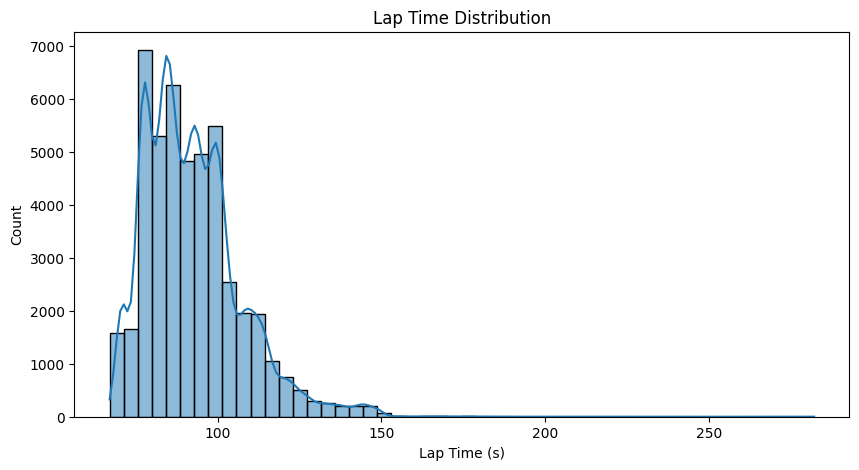

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df["lap_time"], bins=50, kde=True)
plt.title("Lap Time Distribution")
plt.xlabel("Lap Time (s)")
plt.show()

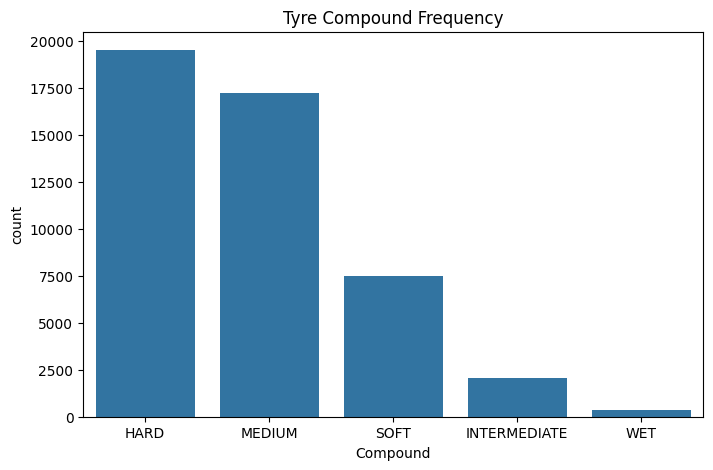

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="compound", order=df["compound"].value_counts().index)
plt.title("Tyre Compound Frequency")
plt.xlabel("Compound")
plt.show()

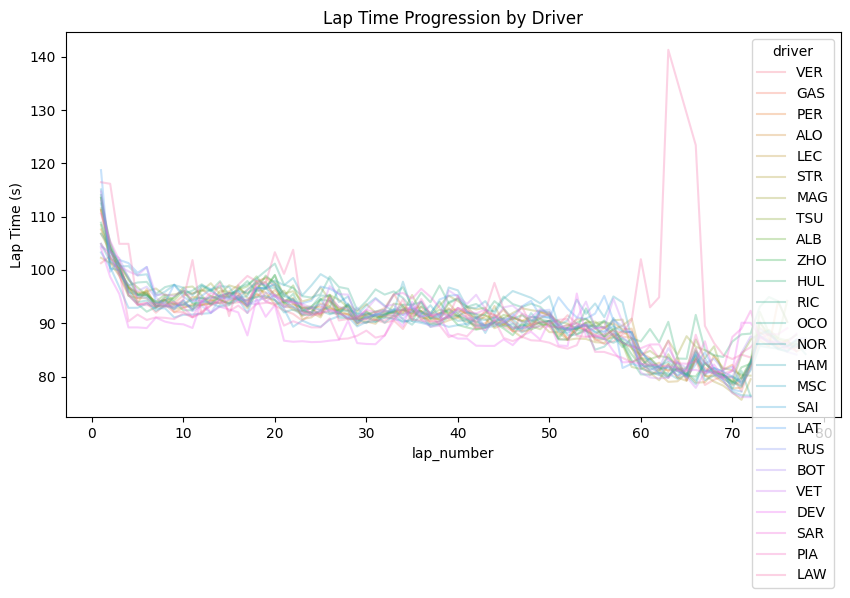

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="lap_number", y="lap_time", hue="driver", errorbar=None, alpha=0.3)
plt.title("Lap Time Progression by Driver")
plt.ylabel("Lap Time (s)")
plt.show()

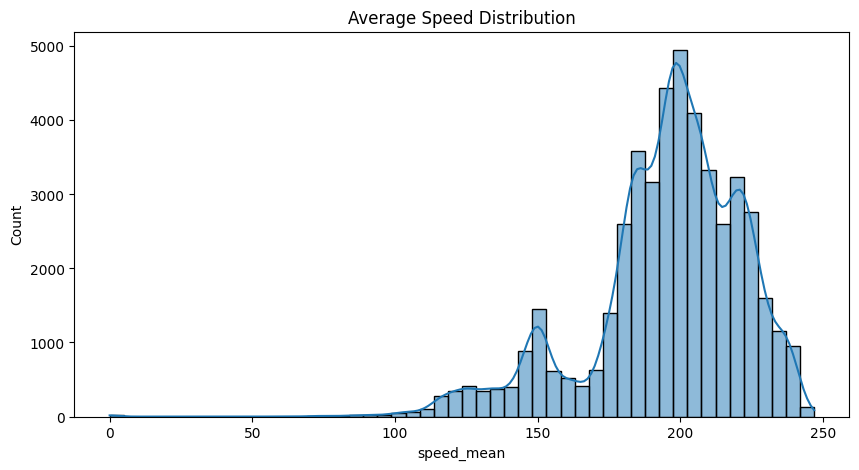

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df["speed_mean"], bins=50, kde=True)
plt.title("Average Speed Distribution")
plt.show()

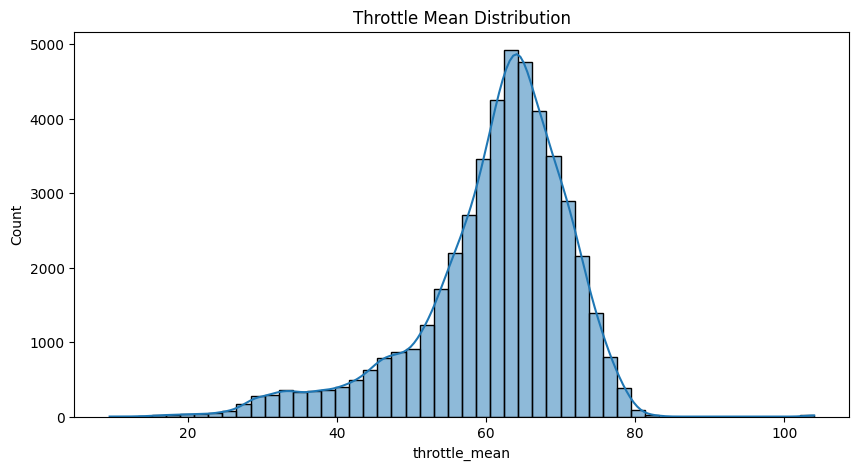

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df["throttle_mean"], bins=50, kde=True)
plt.title("Throttle Mean Distribution")
plt.show()

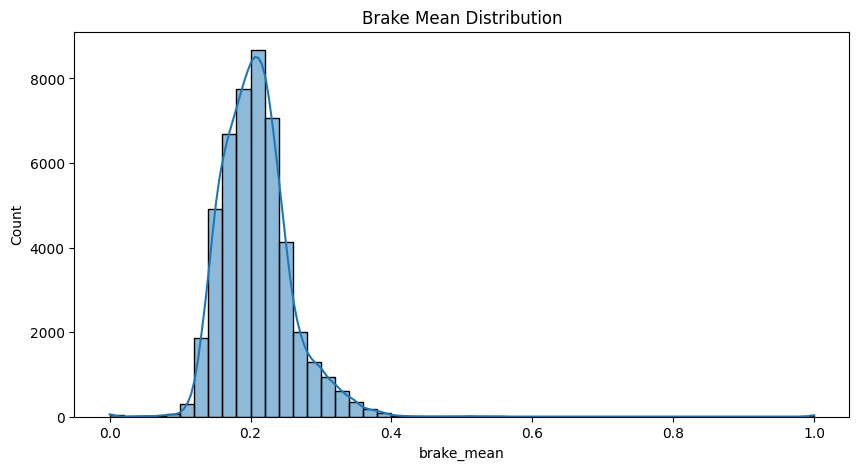

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df["brake_mean"], bins=50, kde=True)
plt.title("Brake Mean Distribution")
plt.show()

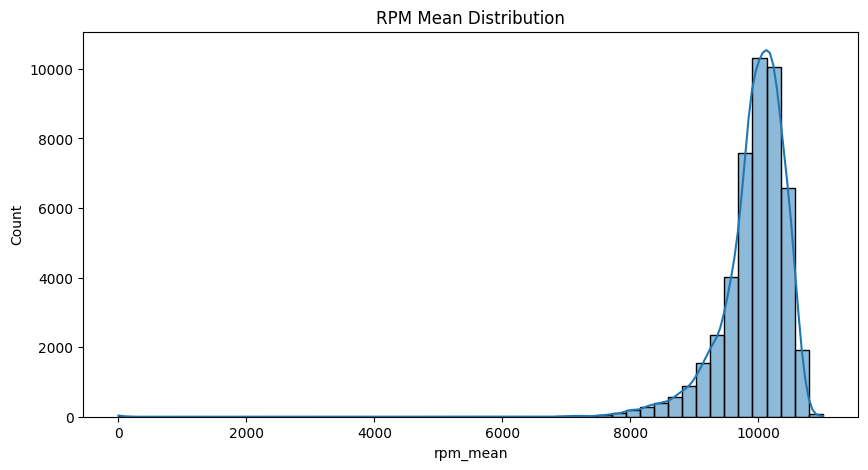

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df["rpm_mean"], bins=50, kde=True)
plt.title("RPM Mean Distribution")
plt.show()

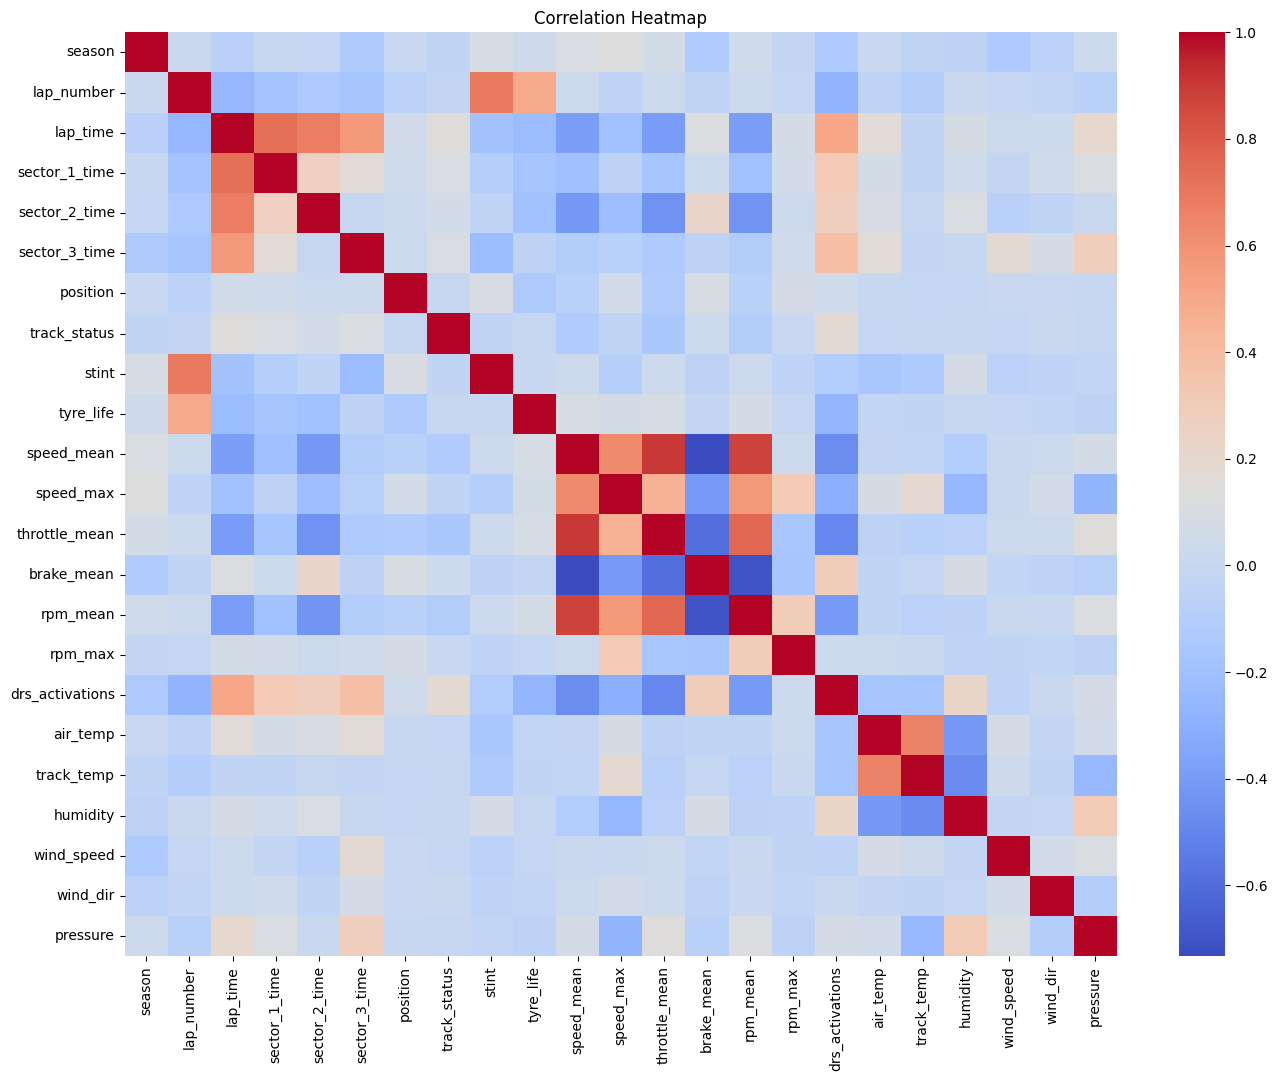

In [15]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
corr_lap = corr["lap_time"].sort_values(ascending=False)
corr_lap.head(20)

lap_time           1.000000
sector_1_time      0.723781
sector_2_time      0.679696
sector_3_time      0.563837
drs_activations    0.506434
pressure           0.197597
air_temp           0.164379
track_status       0.143899
brake_mean         0.115376
humidity           0.085904
rpm_max            0.071789
position           0.054976
wind_dir           0.033603
wind_speed         0.031929
track_temp        -0.031679
season            -0.070857
stint             -0.187918
speed_max         -0.192857
tyre_life         -0.228276
lap_number        -0.258276
Name: lap_time, dtype: float64

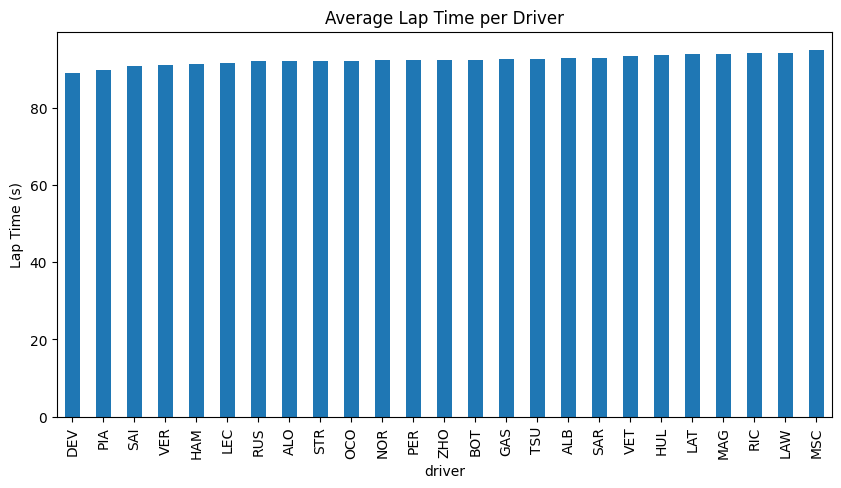

In [18]:
plt.figure(figsize=(10,5))
driver_summary.plot(kind="bar")
plt.title("Average Lap Time per Driver")
plt.ylabel("Lap Time (s)")
plt.show()

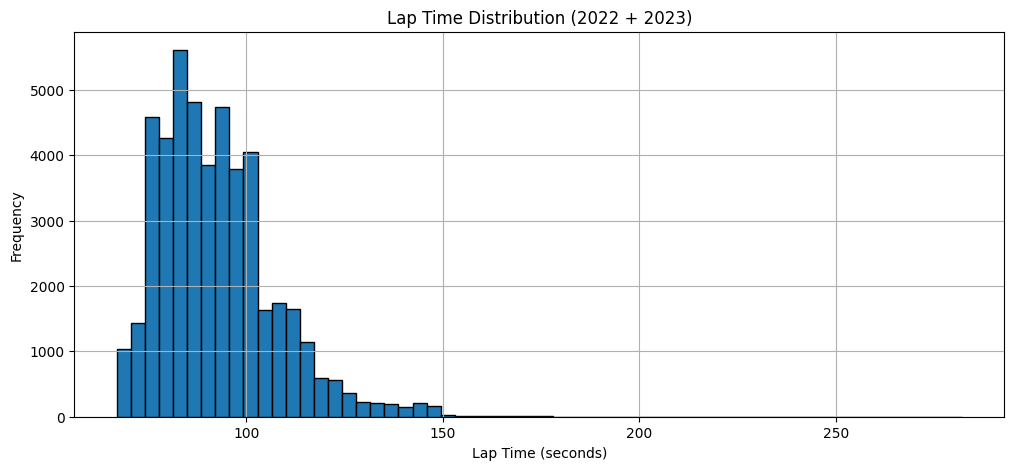

In [19]:
plt.figure(figsize=(12,5))
df['lap_time'].dropna().hist(bins=60, edgecolor='black')
plt.title("Lap Time Distribution (2022 + 2023)")
plt.xlabel("Lap Time (seconds)")
plt.ylabel("Frequency")
plt.show()
